In [2]:
import os

In [3]:
path_name = os.getcwd()
folder = "July2019"

In [4]:
from mta_gtfs_data_getter import download_gtfs_data

In [5]:
download_gtfs_data(folder)

Done! Check the July2019 folder


In [7]:
from mta_gtfs_shapefiles_maker import make_bus_routes_shapefiles, make_bus_stops_shapefiles, make_rail_routes_shapefiles, make_rail_stops_shapefiles, make_subway_entrances_shapefiles

In [8]:
rails = ["LIRR", "metro_north", "nyc_subway"]

In [9]:
for rail in rails:
    make_rail_routes_shapefiles(path=path_name, folder=folder, rail=rail)
    make_rail_stops_shapefiles(path=path_name, folder=folder, rail=rail)

Created route shapefiles for LIRR


/Users/anastasiaclark/anaconda3/envs/GDAL/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Created stop shapefiles for LIRR


Created route shapefiles for metro_north


Created stop shapefiles for metro_north


Created route shapefiles for nyc_subway


Created stop shapefiles for nyc_subway


In [10]:
make_bus_routes_shapefiles(path=path_name, folder=folder)

Created line shapefiles for local and express bus routes


In [11]:
make_bus_stops_shapefiles(path=path_name, folder=folder)

Created stop shapefiles for local and express bus stops


In [12]:
make_subway_entrances_shapefiles(path=path_name, folder=folder)

Created subway entrances shapefiles


In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [25]:
nyc_routes=gpd.read_file('/Users/anastasiaclark/MyStaff/Git_Work/MTA-Mass-Transit/July2019/shapes/routes_nyc_subway_july2019.shp')

In [26]:
nyc_routes.crs

{'init': 'epsg:2263'}

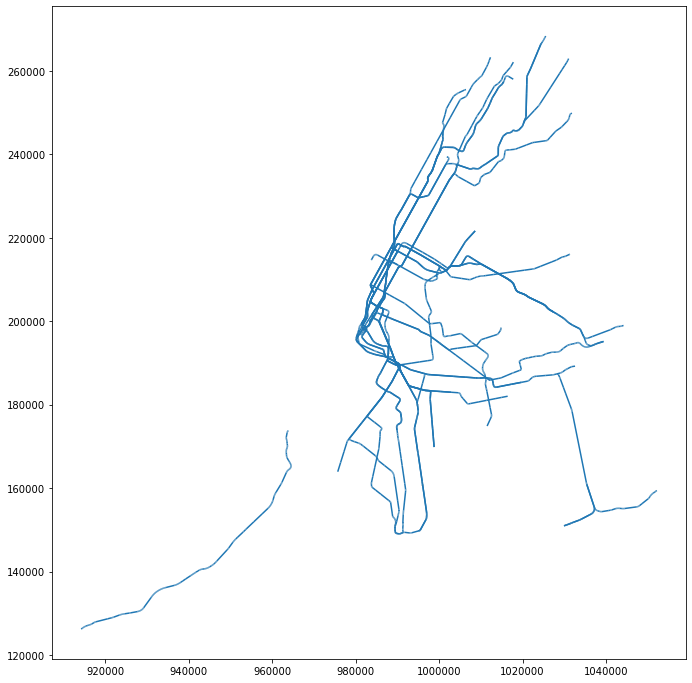

In [28]:
nyc_routes.plot(figsize=(12,12))